In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_circles
import seaborn as sb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import random
import tensorflow as tf
from matplotlib.font_manager import FontProperties

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten

from keras.models import Sequential

In [3]:
china_data = pd.read_csv('chineseMNIST.csv')
print(china_data.head())



# What are the target and features?
y_raw = china_data['label']
chinese_chars = china_data['character']

print("Target variable shape:", y_raw.shape)
print("Unique raw labels:", sorted(y_raw.unique()))
print("Number of unique raw labels:", y_raw.nunique())

# Re-encode labels to 0..14 for training
unique_labels = sorted(y_raw.unique())         # 15 distinct values
label_to_idx = {lab: i for i, lab in enumerate(unique_labels)}
idx_to_label = {i: lab for lab, i in label_to_idx.items()}

y = y_raw.map(label_to_idx).astype('int32')    # <-- encoded labels 0..14
print("Unique encoded labels:", np.unique(y))

# Pixel columns only
pixel_cols = [c for c in china_data.columns if c.startswith('pixel_')]
X_pixels = china_data[pixel_cols]

# Check image size (should be 64 x 64)
num_pixels = X_pixels.shape[1]
img_size = int(np.sqrt(num_pixels))
print(f"Detected image size: {img_size} x {img_size}")

   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel_8  pixel_9  ...  pixel_4088  pixel_4089  pixel_4090  pixel_4091  \
0        0        0  ...           0           0           0           0   
1        0        0  ...           0           0           0           0   
2        0        0  ...           0           0           0           0   
3        0        0  ...           0           0           0           0   
4        0        0  ...           0           0           0           0   

   pixel_4092  pixel_4093  pixel_4094  pixel_4095  label  character  
0         

/tmp/ipython-input-1163588068.py:11: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1163588068.py:11: UserWarning: Glyph 19971 (\N{CJK UNIFIED IDEOGRAPH-4E03}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1163588068.py:11: UserWarning: Glyph 19975 (\N{CJK UNIFIED IDEOGRAPH-4E07}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1163588068.py:11: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1163588068.py:11: UserWarning: Glyph 20061 (\N{CJK UNIFIED IDEOGRAPH-4E5D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1163588068.py:11: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1163588068.py:11: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missi

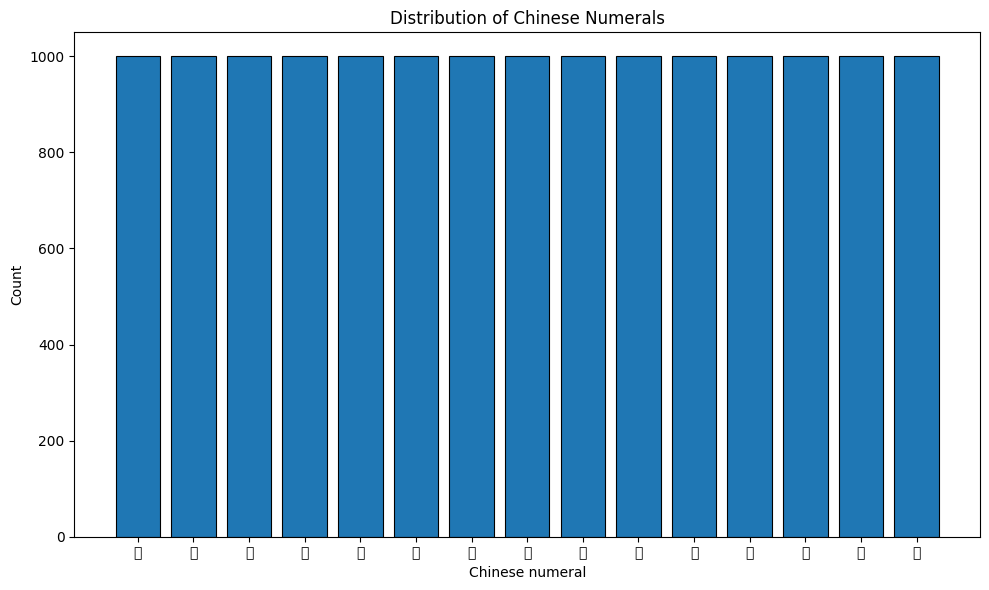

In [4]:

char_counts = chinese_chars.value_counts().sort_index()  # sorted by character

plt.figure(figsize=(10, 6))
bars = plt.bar(char_counts.index, char_counts.values, edgecolor='black', linewidth=0.8)

plt.title("Distribution of Chinese Numerals")
plt.xlabel("Chinese numeral")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [5]:


num_classes = len(unique_labels)               # should be 15
letter_dict = {i: chr(65 + i) for i in range(num_classes)}

china_data['encoded_label'] = y
china_data['char'] = china_data['encoded_label'].map(letter_dict)

print(
    china_data[['label', 'encoded_label', 'character', 'char']]
    .drop_duplicates()
    .sort_values('encoded_label')
)

letters = china_data['char']   # A–O labels for each row

           label  encoded_label character char
6000           0              0         零    A
7000           1              1         一    B
8000           2              2         二    C
9000           3              3         三    D
10000          4              4         四    E
11000          5              5         五    F
12000          6              6         六    G
13000          7              7         七    H
14000          8              8         八    I
0              9              9         九    J
1000          10             10         十    K
2000         100             11         百    L
3000        1000             12         千    M
4000       10000             13         万    N
5000   100000000             14         亿    O


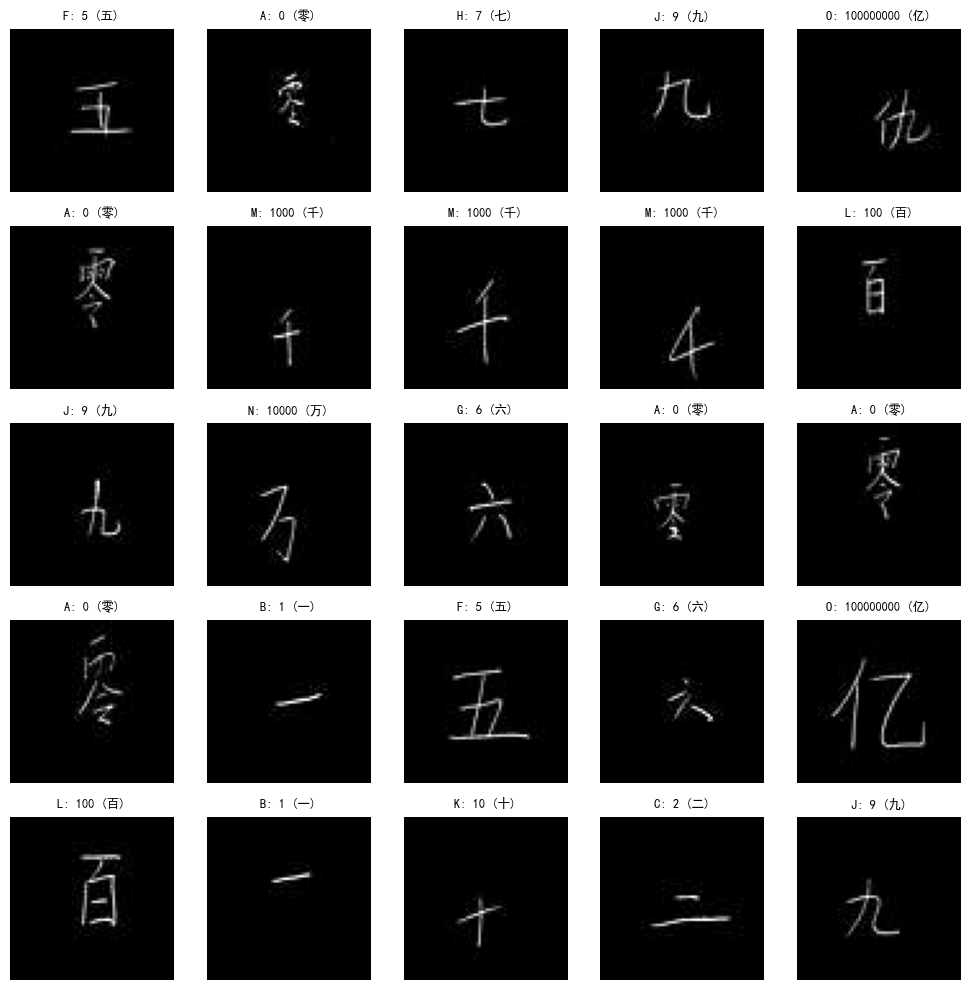

In [6]:
# Next step to visualize stuff
font_path = "/content/SimHei.ttf"
ch_font = FontProperties(fname=font_path)

np.random.seed(42)
sample_indices = np.random.choice(len(X_pixels), size=25, replace=False)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for ax, idx in zip(axes.ravel(), sample_indices):
    img = X_pixels.iloc[idx].values.reshape(img_size, img_size)

    english_num = y_raw.iloc[idx]          # original number (e.g., 10, 100, ...)
    chinese_num = chinese_chars.iloc[idx]  # Chinese numeral
    letter_class = letters.iloc[idx]       # A–O (encoded class)

    title_text = f"{letter_class}: {english_num} ({chinese_num})"

    ax.imshow(img, cmap='gray')
    ax.set_title(title_text, fontproperties=ch_font, fontsize=9)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:


X_scaled = X_pixels.astype('float32') / 255.0

print("Scaled feature shape:", X_scaled.shape)
print("Min pixel value:", X_scaled.min())
print("Max pixel value:", X_scaled.max())


Scaled feature shape: (15000, 4096)
Min pixel value: pixel_0       0.0
pixel_1       0.0
pixel_2       0.0
pixel_3       0.0
pixel_4       0.0
             ... 
pixel_4091    0.0
pixel_4092    0.0
pixel_4093    0.0
pixel_4094    0.0
pixel_4095    0.0
Length: 4096, dtype: float64
Max pixel value: pixel_0       0.000000
pixel_1       0.000000
pixel_2       0.000000
pixel_3       0.000000
pixel_4       0.000000
                ...   
pixel_4091    0.027451
pixel_4092    0.007843
pixel_4093    0.031373
pixel_4094    0.035294
pixel_4095    0.031373
Length: 4096, dtype: float64


In [8]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled.values,
    y.values,
    test_size=0.2,
    random_state=42,
    stratify=y.values
)

print("X_train raw shape:", X_train.shape)
print("X_test raw shape:", X_test.shape)

# Reshape into (N, 64, 64, 1) for Conv2D
X_train = X_train.reshape(-1, img_size, img_size, 1)
X_test  = X_test.reshape(-1, img_size, img_size, 1)

print("X_train reshaped:", X_train.shape)
print("X_test reshaped:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Unique y_train labels:", np.unique(y_train))

X_train raw shape: (12000, 4096)
X_test raw shape: (3000, 4096)
X_train reshaped: (12000, 64, 64, 1)
X_test reshaped: (3000, 64, 64, 1)
y_train shape: (12000,)
y_test shape: (3000,)
Unique y_train labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [9]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPool2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')   # 15 classes
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,559 (2.61 MB)

 Trainable params: 684,559 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # required loss
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=50,              # at least 50
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.3691 - loss: 1.9276 - val_accuracy: 0.8787 - val_loss: 0.3976
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8323 - loss: 0.5040 - val_accuracy: 0.9537 - val_loss: 0.1607
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9112 - loss: 0.2664 - val_accuracy: 0.9597 - val_loss: 0.1361
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9354 - loss: 0.1999 - val_accuracy: 0.9687 - val_loss: 0.1008
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9487 - loss: 0.1477 - val_accuracy: 0.9737 - val_loss: 0.0763
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9631 - loss: 0.1159 - val_accuracy: 0.9800 - val_loss: 0.0695
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9691 - loss: 0.0938 - val_accuracy: 0.9720 - val_loss: 0.0906
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9661 - loss: 0.0974 - val_accura

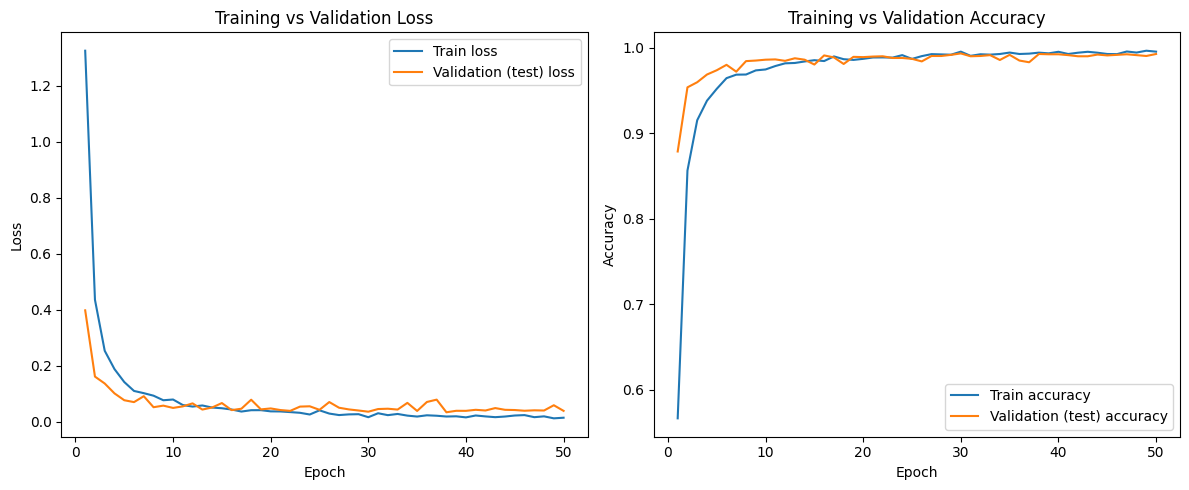

In [11]:
history_dict = history.history

train_loss = history_dict['loss']
val_loss   = history_dict['val_loss']
train_acc  = history_dict['accuracy']
val_acc    = history_dict['val_accuracy']

epochs_range = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

# ---- Loss ----
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Train loss')
plt.plot(epochs_range, val_loss, label='Validation (test) loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# ---- Accuracy ----
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Train accuracy')
plt.plot(epochs_range, val_acc, label='Validation (test) accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


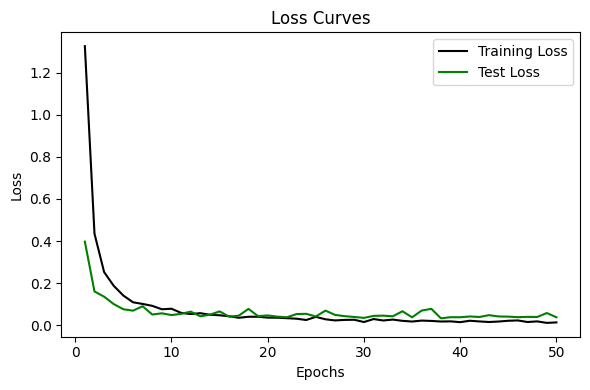

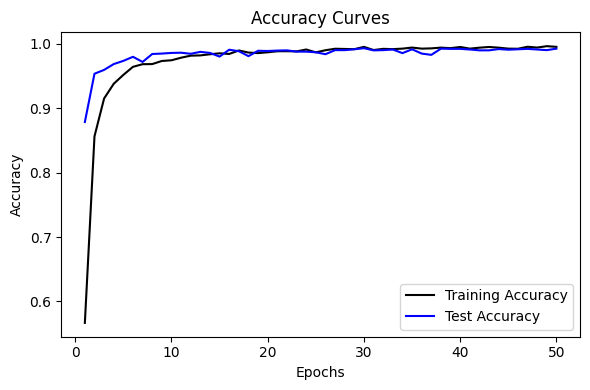

In [12]:
import matplotlib.pyplot as plt

# Extract history
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# ==== Loss Curves ====
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_loss, color='black', label='Training Loss')
plt.plot(epochs, val_loss,   color='green', label='Test Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# ==== Accuracy Curves ====
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_acc, color='black', label='Training Accuracy')
plt.plot(epochs, val_acc,   color='blue',  label='Test Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()








In [13]:
from sklearn.metrics import confusion_matrix

# predicting class probabilities
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix (rows = actual, columns = predicted)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n")
print(cm)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Confusion matrix:

[[200   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 199   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0 196   4   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   3 197   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 200   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 199   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0 200   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1 199   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 200   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0 197   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0 196   0   4   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0 199   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   2   0 197   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0 199   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 20

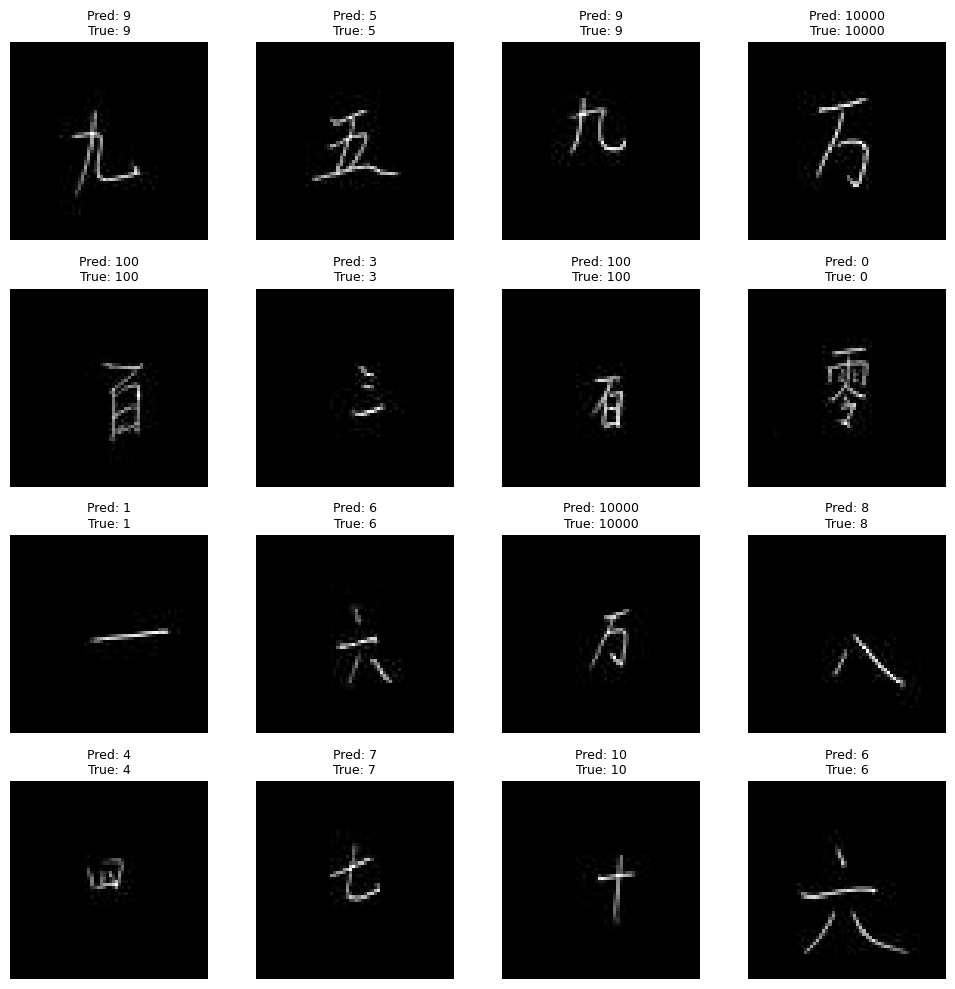

In [14]:
num_images = 16
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(4, 4, i + 1)

    img = X_test[i].reshape(img_size, img_size)

    true_class = y_test[i]           # 0..14
    pred_class = y_pred[i]           # 0..14

    # Convert back to English numbers using idx_to_label
    true_english = idx_to_label[true_class]
    pred_english = idx_to_label[pred_class]

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {pred_english}\nTrue: {true_english}", fontsize=9)

plt.tight_layout()
plt.show()

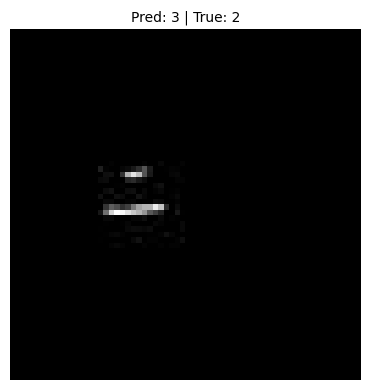

In [15]:

label_to_chinese = (
    china_data.groupby('encoded_label')['character']
    .first()
    .to_dict()
)

# This is looking for indices where the model got it wrong
mis_idx = np.where(y_pred != y_test)[0]

if len(mis_idx) == 0:
    print("No misclassified images found! 🎉")
else:
    np.random.seed(123)
    idx = np.random.choice(mis_idx)

    img = X_test[idx].reshape(img_size, img_size)

    true_class = y_test[idx]
    pred_class = y_pred[idx]

    true_english = idx_to_label[true_class]
    pred_english = idx_to_label[pred_class]

    # this is for the true class, that the number is true. This is just for a demonstration
    chinese_char = label_to_chinese[true_class]

    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {pred_english} | True: {true_english}", fontsize=10)
    plt.xlabel(chinese_char, fontproperties=ch_font, fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Now this section is for Q4

In [16]:
taxi = pd.read_csv('taxifares.csv')

print(taxi)

taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])

print(taxi.columns)

           key  fare_amount          pickup_datetime  pickup_longitude  \
0      08:00.0         17.5  2013-05-25 01:08:00 UTC         40.706932   
1      39:00.0         22.0  2013-05-22 13:39:00 UTC         40.719187   
2      01:00.0         11.0  2013-05-24 21:01:00 UTC         40.731230   
3      31:00.0         18.5  2013-05-26 19:31:00 UTC         40.740127   
4      57:00.0         10.0  2013-05-23 18:57:00 UTC         40.734352   
...        ...          ...                      ...               ...   
55362  56:32.0          7.7  2010-07-26 17:56:32 UTC        -73.137393   
55363  22:00.0          7.3  2009-12-06 12:22:00 UTC        -73.166217   
55364  56:00.0         19.7  2011-11-04 18:56:00 UTC        -72.554215   
55365  15:00.0         11.0  2013-02-26 22:15:00 UTC        -73.988063   
55366  57:00.0          9.5  2013-03-15 21:57:00 UTC          0.000000   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0           -74.008970          

In [17]:
print("The target variable is: fare amount.")

The target variable is: fare amount.


In [18]:
print(taxi.columns)

X = taxi.drop('key', axis = 1)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


In [19]:
print(taxi['pickup_datetime'])

0       2013-05-25 01:08:00+00:00
1       2013-05-22 13:39:00+00:00
2       2013-05-24 21:01:00+00:00
3       2013-05-26 19:31:00+00:00
4       2013-05-23 18:57:00+00:00
                   ...           
55362   2010-07-26 17:56:32+00:00
55363   2009-12-06 12:22:00+00:00
55364   2011-11-04 18:56:00+00:00
55365   2013-02-26 22:15:00+00:00
55366   2013-03-15 21:57:00+00:00
Name: pickup_datetime, Length: 55367, dtype: datetime64[ns, UTC]


In [20]:
taxi["pickup_weekday"] = taxi["pickup_datetime"].dt.dayofweek   # 0 = Monday, 6 = Sunday
taxi["pickup_hour"] = taxi["pickup_datetime"].dt.hour
taxi["pickup_minute"] = taxi["pickup_datetime"].dt.minute

# dropping original datetime column
taxi = taxi.drop(columns=["pickup_datetime"])

print(taxi[["pickup_weekday", "pickup_hour", "pickup_minute"]].head())

   pickup_weekday  pickup_hour  pickup_minute
0               5            1              8
1               2           13             39
2               4           21              1
3               6           19             31
4               3           18             57


In [21]:
a = (taxi["dropoff_longitude"] - taxi["pickup_longitude"]) * 54.6

# b = diff in latitude * 69.0
b = (taxi["dropoff_latitude"] - taxi["pickup_latitude"]) * 69.0

taxi["distance_miles"] = np.sqrt(a**2 + b**2)

print(taxi[["distance_miles"]].head())


taxi = taxi.drop(columns=[
    "pickup_longitude", "pickup_latitude",
    "dropoff_longitude", "dropoff_latitude"
])

print("Final columns:\n", taxi.columns.tolist())



   distance_miles
0        2.880330
1        2.698705
2        2.471339
3        1.359135
4        2.910496
Final columns:
 ['key', 'fare_amount', 'passenger_count', 'pickup_weekday', 'pickup_hour', 'pickup_minute', 'distance_miles']


In [22]:
# dropping key since it interferes

taxi = taxi.drop('key', axis = 1)

In [23]:
X = taxi.drop('fare_amount', axis = 1)
y = taxi['fare_amount']

print(X.columns)

Index(['passenger_count', 'pickup_weekday', 'pickup_hour', 'pickup_minute',
       'distance_miles'],
      dtype='object')


In [24]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [25]:
model = Sequential()


model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))


model.add(Dense(64, activation='relu'))


# model.add(Dense(64, activation='relu'))


model.add(Dense(1))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/50
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 673.3049 - mean_squared_error: 673.3049 - val_loss: 33.1235 - val_mean_squared_error: 33.1235
Epoch 2/50
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 50.7944 - mean_squared_error: 50.7944 - val_loss: 101.8519 - val_mean_squared_error: 101.8519
Epoch 3/50
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 104.0505 - mean_squared_error: 104.0505 - val_loss: 42.2308 - val_mean_squared_error: 42.2308
Epoch 4/50
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 47.8274 - mean_squared_error: 47.8274 - val_loss: 34.7875 - val_mean_squared_error: 34.7875
Epoch 5/50
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 45.4098 - mean_squared_error: 45.4098 - val_loss: 30.2753 - val_mean_squared_error: 30.2753
Epoch 6/50
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 33.8205 - mean_squared_error: 33.8205 - val_loss: 27.9114 - val_mean_squared_error: 27.9114
Epoch 7/50
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 30.1416 

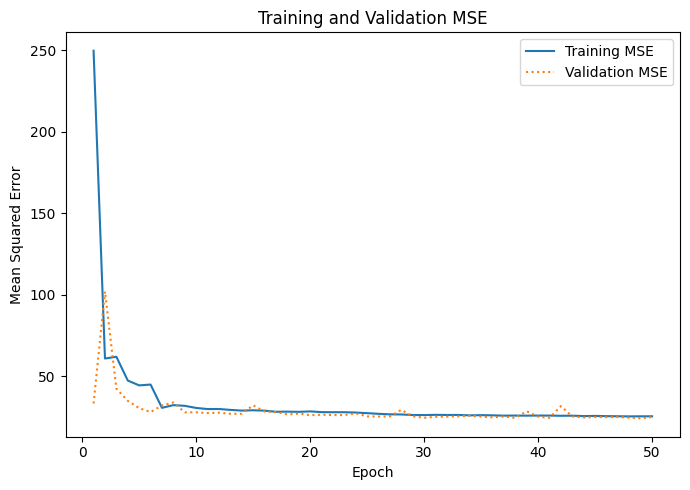

In [27]:
train_mse = history.history['mean_squared_error']
val_mse   = history.history['val_mean_squared_error']
epochs    = range(1, len(train_mse) + 1)

plt.figure(figsize=(7, 5))
plt.plot(epochs, train_mse, label='Training MSE')
plt.plot(epochs, val_mse, linestyle='dotted', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import r2_score

# Predictions on validation set
y_val_pred = model.predict(X_val).flatten()

# R-squared
r2 = r2_score(y_val, y_val_pred)
print("R-squared score:", r2)

520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
R-squared score: 0.7328002797920431


In [29]:
print(X.columns)

Index(['passenger_count', 'pickup_weekday', 'pickup_hour', 'pickup_minute',
       'distance_miles'],
      dtype='object')


In [30]:
input_features = np.array([[
    2,    # distance_miles
    4,      # passenger_count
    15,      # pickup_weekday (Friday)
    20,     # pickup_hour (3 PM)
    3      # pickup_minute
]], dtype="float32")

# Predict fare
fare_pred = model.predict(input_features)[0][0]

print(f"\nThe fare for 2 passengers to ride 3.2 miles at 3:20 pm on a Friday is $ {fare_pred:.6f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step

The fare for 2 passengers to ride 3.2 miles at 3:20 pm on a Friday is $ 16.166706
